<a href="https://colab.research.google.com/github/aditis1204/Regression-using-Keras/blob/master/tensorflow_keras_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf


In [0]:
tf.__version__

'2.2.0-rc3'

In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/TF_2_Notebooks_and_Data/DATA/fake_reg.csv')

In [0]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


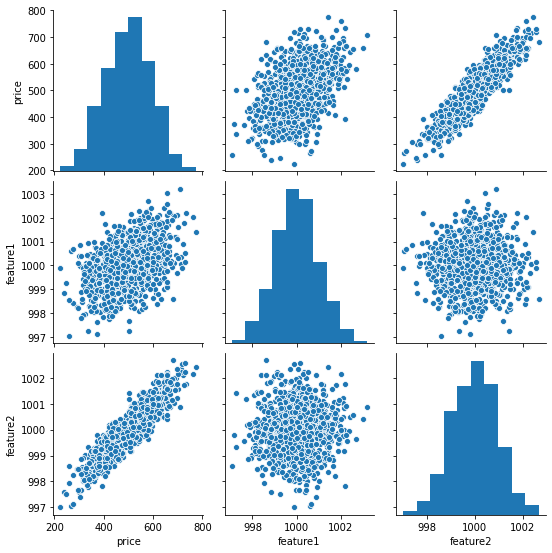

In [0]:
sns.pairplot(df)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df[['feature1','feature2']].values

In [0]:
y = df['price'].values

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [0]:
X_train.shape

(700, 2)

In [0]:
X_test.shape

(300, 2)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_train = scaler.transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation 


In [0]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

In [0]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256769.5156
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256683.2344
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256836.2500
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256660.7500
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256734.7969
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 256578.3594
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 256649.2500
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 256806.0469
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 256563.3906
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 256757.7656
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 256501.6094
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

In [0]:
import matplotlib.pyplot as plt

loss = model.history.history['loss']

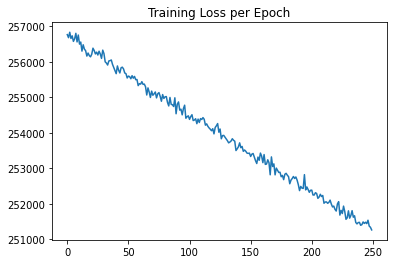

In [0]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [0]:
model.evaluate(X_test,y_test,verbose=0)

252521.84375

In [0]:
model.evaluate(X_train,y_train,verbose=0)

251373.34375

In [0]:
test_predictions = model.predict(X_test)

In [0]:
#test_predictions = pd.Series(test_predictions.reshape(300,))
test_predictions

array([[5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],
       [5.5058904],


In [0]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [0]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [0]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [0]:
test_predictions

0      5.505890
1      5.505890
2      5.505890
3      5.505890
4      5.505890
         ...   
295    5.505890
296    5.499916
297    5.505890
298    5.505890
299    5.505890
Length: 300, dtype: float32

In [0]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions']

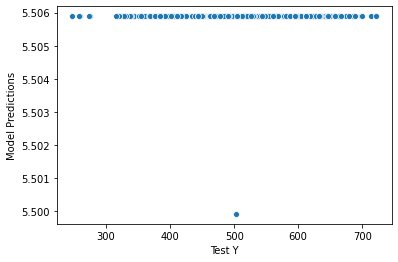

In [0]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [0]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

494.869469019977

In [0]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [0]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])**0.5

503.6743224888245

In [0]:
new_gem=[[998,1000]]
new_gem=scaler.transform(new_gem)

In [0]:
model.predict(new_gem)

array([[5.5058904]], dtype=float32)

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('my_gem_model.h5')

In [0]:
later_model = load_model('my_gem_model.h5')

In [0]:
later_model.predict(new_gem)

array([[5.5058904]], dtype=float32)



###### Keras Regression:


In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
df = pd.read_csv('/content/drive/My Drive/TF_2_Notebooks_and_Data/DATA/kc_house_data.csv')

In [0]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


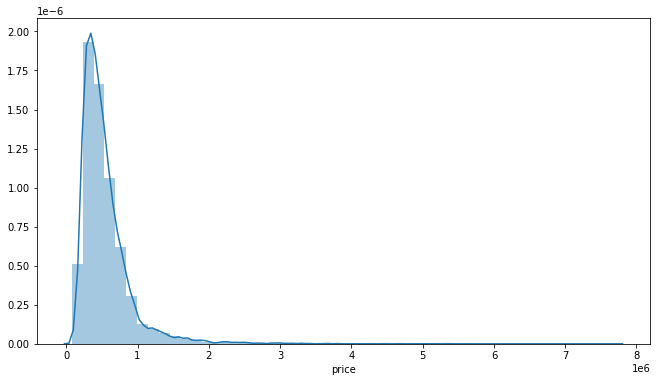

In [0]:
plt.figure(figsize=(11,6))
sns.distplot(df['price'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fc5a43550>,
      dtype=object)

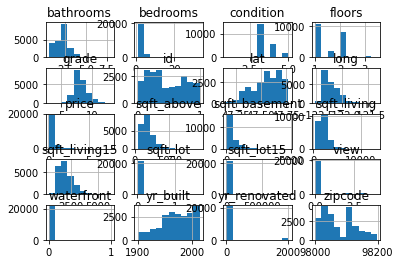

In [0]:
df.hist()

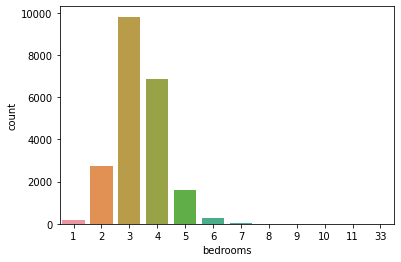

In [0]:
sns.countplot(df['bedrooms'])

In [0]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

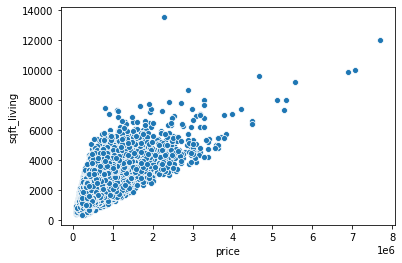

In [0]:
sns.scatterplot(x='price',y='sqft_living',data=df)

In [0]:
  # df['zipcode'].value_counts()

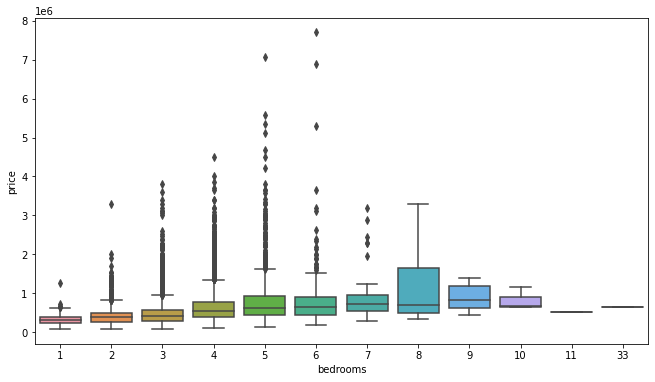

In [0]:
plt.figure(figsize=(11,6))
sns.boxplot(x='bedrooms',y='price',data=df)

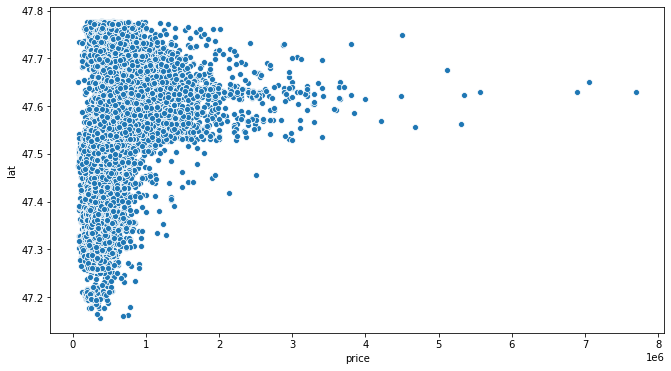

In [0]:
plt.figure(figsize=(11,6))

sns.scatterplot(x='price',y='lat',data=df)


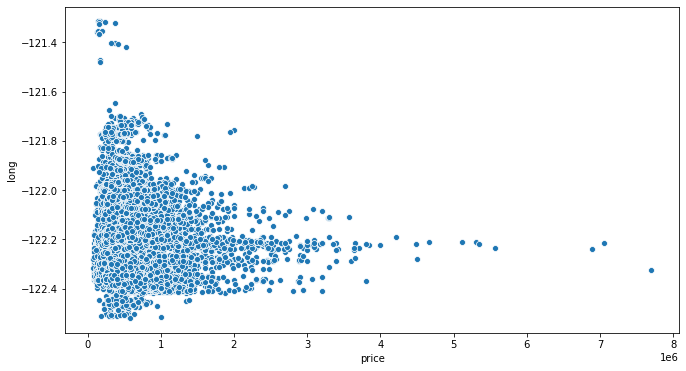

In [0]:
plt.figure(figsize=(11,6))

sns.scatterplot(x='price',y='long',data=df)

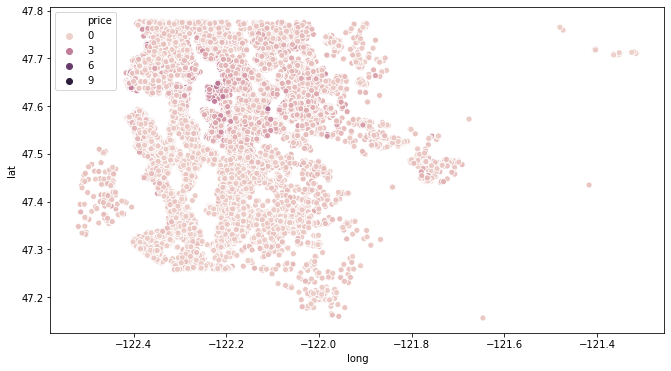

In [0]:
plt.figure(figsize=(11,6))

sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [0]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [0]:
len(df)

21597

In [0]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

In [0]:
non_top_1_perc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


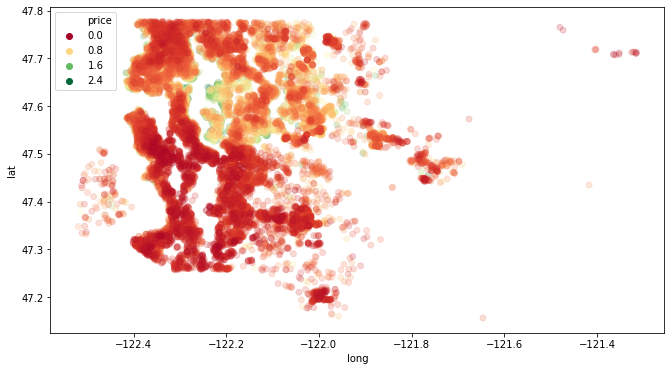

In [0]:
plt.figure(figsize=(11,6))

sns.scatterplot(x='long',y='lat',data=non_top_1_perc,edgecolor=None,alpha=0.2,palette='RdYlGn',hue='price')

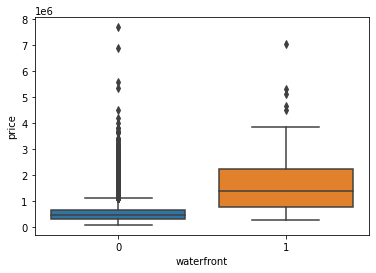

In [0]:
sns.boxplot(x='waterfront',y='price',data=df)

In [0]:
df=df.drop('id',axis=1)

In [0]:
df['date'] = pd.to_datetime(df['date'])

In [0]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [0]:
df['year'] = df['date'].apply(lambda date: date.year) 
df['month'] = df['date'].apply(lambda date: date.month) 

In [0]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


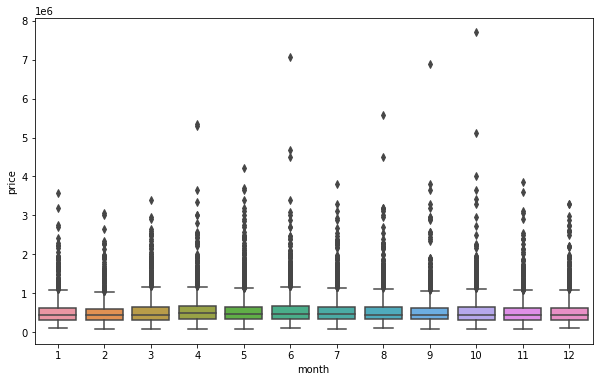

In [0]:
plt.figure(figsize=(10,6)),
sns.boxplot(x='month',y='price',data=df)

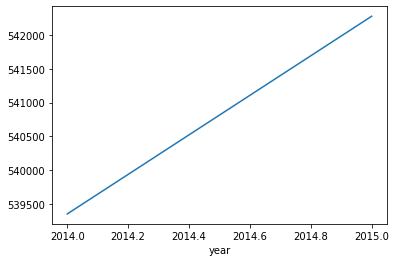

In [0]:
df.groupby('year').mean()['price'].plot()

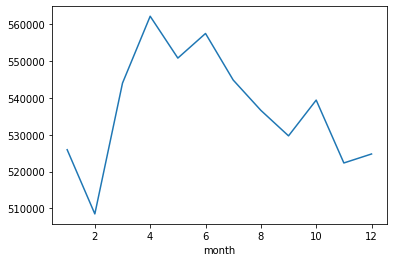

In [0]:
df.groupby('month').mean()['price'].plot()

In [0]:
df = df.drop('date',axis=1)

In [0]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [0]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [0]:
df =df.drop('zipcode',axis=1)

In [0]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [0]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
X_train.shape

(15117, 19)

In [0]:
model = Sequential()

model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [0]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 429330792448.0000 - val_loss: 418375041024.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429015138304.0000 - val_loss: 413580918784.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 408062853120.0000 - val_loss: 368730112000.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 313869107200.0000 - val_loss: 221769236480.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 155600322560.0000 - val_loss: 101852217344.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 103344381952.0000 - val_loss: 93912768512.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 95974424576.0000 - val_loss: 92216360960.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 94250098688.0000 - val_loss: 90597097472.0000
Epoch 9/400
119/119 [

In [0]:
losses = pd.DataFrame(model.history.history)

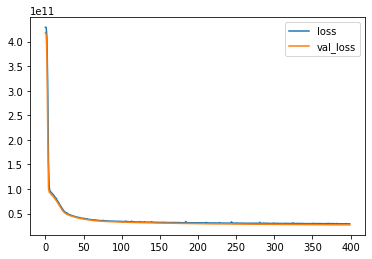

In [0]:
losses.plot()

In [0]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [0]:
predictions = model.predict(X_test)

In [0]:
np.sqrt(mean_squared_error(y_test,predictions))

164412.57881892886

In [0]:
mean_absolute_error(y_test,predictions)

101245.78199266976

In [0]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [0]:
 5.402966e+05

540296.6

In [0]:
explained_variance_score(y_test,predictions)

0.7963601521457435

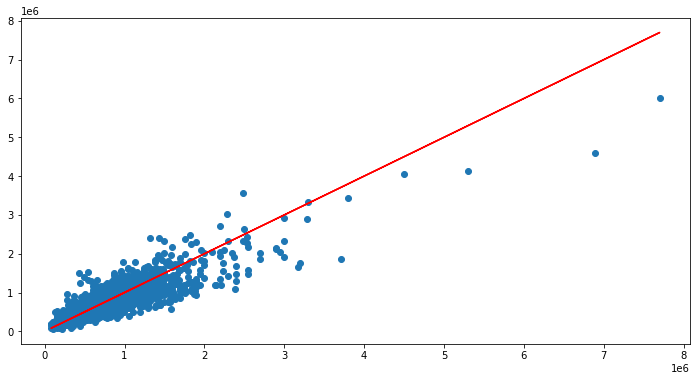

In [0]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [0]:
single_house = df.drop('price',axis=1).iloc[0]


In [0]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [0]:
model.predict(single_house)

array([[280709.53]], dtype=float32)

In [0]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
